### Import Libraries

In [174]:
# data analysis 
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Read csv. files

In [175]:
#read data files and combine them
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_combined = [df_train, df_test]

In [176]:
#show all rows data
pd.set_option('display.max_rows',1000)

### Data Analysis

In [177]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [179]:
df_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hickman, Mr. Lewis",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [180]:
df_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Moubarek, Mrs. George (Omine Amenia"" Alexander)""",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [181]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [182]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Data information

|          Information          | Training Data | Test Data |
|:------------------------------|:--------------|:----------|
|# of Passengers                |      891      |    418    |
|% of missing Age feature       |     19.8%     |   20.5%   |
|% of missing Cabin feature     |     77.1%     |   78.2%   |
|% of missing Embarked feature  |     0.22%     |     -     |
|% of missing Fare feature      |       -       |   0.23%   |

### Graphical analysis at first glance

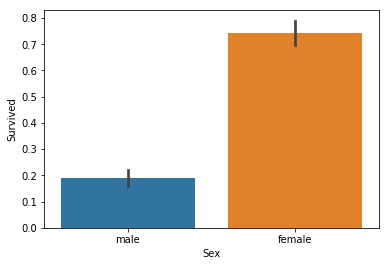

In [183]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=df_train)

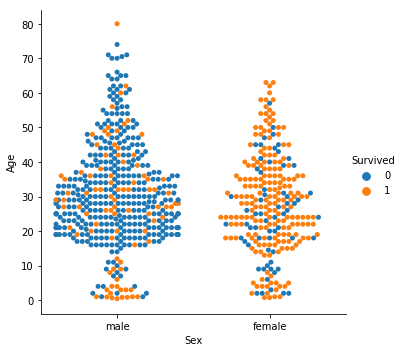

In [185]:
sns.catplot(x="Sex", y="Age", hue="Survived", kind="swarm", data=df_train)

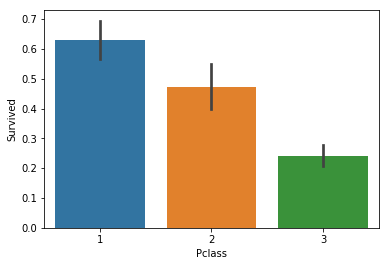

In [184]:
sns.barplot(x="Pclass", y="Survived", data=df_train)

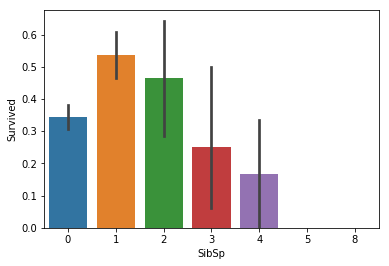

In [191]:
sns.barplot(x="SibSp", y="Survived", data=df_train)

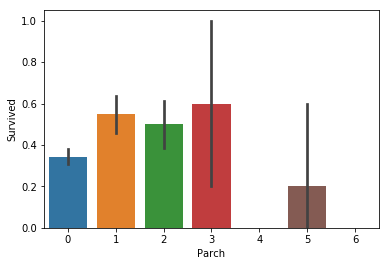

In [192]:
sns.barplot(x="Parch", y="Survived", data=df_train)

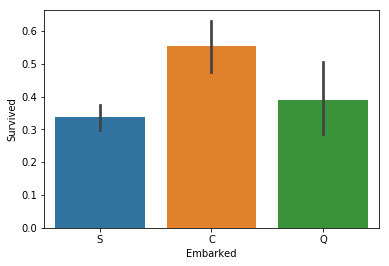

In [193]:
sns.barplot(x="Embarked", y="Survived", data=df_train)

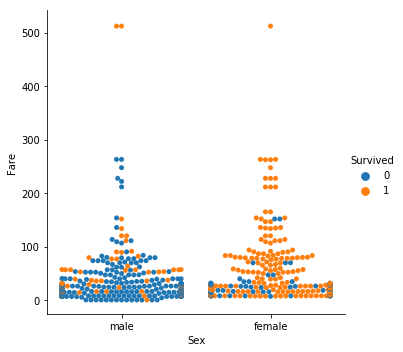

In [194]:
sns.catplot(x="Sex", y="Fare", hue="Survived", kind="swarm", data=df_train)

### Set Categories and Numerical Values 

In [195]:
df_train.groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [196]:
# set a numerical value for Sex in the training and test data (combined)
for dataset in df_combined:
    
    dataset['Sex'] = dataset['Sex'].replace('male', 0)
    dataset['Sex'] = dataset['Sex'].replace('female', 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000109FDF60>]],
      dtype=object)

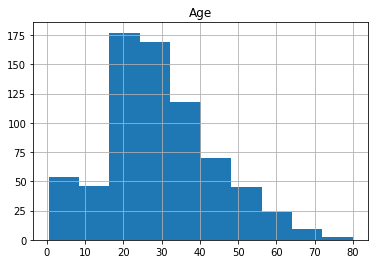

In [197]:
# now we are going to set Age Range for different Age values.
# In order to do that, firstly we analyze histogram to see different age categories easily.
df_train.hist(column="Age")

In [198]:
# There are some titles in the Name column. Let's extract them

for dataset in df_combined:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [199]:
# Classify titles

for dataset in df_combined:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [200]:
# Set numbers for categories

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in df_combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [201]:
# Sibp and Parch columns show family members of passengers. 
# Therefore we can sum them up and create a new column named Family Size

for dataset in df_combined:
    dataset['Family Size'] = dataset['SibSp'] + dataset['Parch'] + 1
    
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1


In [206]:
# set a numerical value for Embark in the training and test data (combined)
df_combined = [df_train, df_test]
for dataset in df_combined:
    
    dataset['Embarked'] = dataset['Embarked'].replace('C', 1)
    dataset['Embarked'] = dataset['Embarked'].replace('S', 2)
    dataset['Embarked'] = dataset['Embarked'].replace('Q', 3)
    
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size,Age_y,Age2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,1,2,32.36809,22.00000
1,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,1,1,32.36809,35.00000
2,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,3.0,1,1,32.36809,32.36809
3,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,2.0,1,1,32.36809,54.00000
4,13,0,3,"Saundercock, Mr. William Henry",0,20.0,0,0,A/5. 2151,8.0500,NaN,2.0,1,1,32.36809,20.00000


### Fill Nan in Age Column in Training Data 

In [202]:
#age_mapping = df_train.groupby('Title')['Age'].mean()
age_mapping = df_train[['Title','Age']].groupby(['Title'],as_index=False).mean()
age_mapping

,Title,Age
0,1,32.368090
1,2,21.845638
2,3,35.788991
3,4,4.574167
4,5,45.545455


In [203]:
df_train=pd.merge(df_train,age_mapping,how='inner',on='Title')

In [204]:
df_train['Age2'] = df_train['Age_x']

In [205]:
df_train.loc[df_train['Age2'].isnull(),'Age2'] = df_train['Age_y']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size,Age_y,Age2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,32.36809,22.00000
1,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1,32.36809,35.00000
2,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,1,1,32.36809,32.36809
3,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1,1,32.36809,54.00000
4,13,0,3,"Saundercock, Mr. William Henry",0,20.0,0,0,A/5. 2151,8.0500,NaN,S,1,1,32.36809,20.00000


### Fill Nan in Age Column in Test Data 

In [207]:
age_mapping2 = df_test[['Title','Age']].groupby(['Title'],as_index=False).mean()
age_mapping2

,Title,Age
0,1,32.000000
1,2,21.774844
2,3,38.903226
3,4,7.406471
4,5,43.833333


In [208]:
df_test=pd.merge(df_test,age_mapping2,how='inner',on='Title')

In [209]:
df_test['Age2'] = df_test['Age_x']

In [210]:
df_test.loc[df_test['Age2'].isnull(),'Age2'] = df_test['Age_y']
df_test.head()

,PassengerId,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size,Age_y,Age2
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3,1,1,32.0,34.5
1,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3,1,1,32.0,62.0
2,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2,1,1,32.0,27.0
3,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,2,1,1,32.0,14.0
4,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,2,1,3,32.0,26.0


### Fill Nan in Embarked Column in Training Data 

In [211]:
freq_embarked = df_train.Embarked.dropna().mode()[0]
freq_embarked

2.0

In [212]:
for dataset in df_combined:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_embarked)
    
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,1.0,0.553571
2,3.0,0.389610
1,2.0,0.339009


In [213]:
#create a new column named Age Range to classify different ages in the training data
bins = [0, 8, 18, 32, 40, 55, 100]
labels = [1,2,3,4,5,6]
df_train['Age Range'] = pd.cut(df_train.Age2, bins, labels = labels,include_lowest = True)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size,Age_y,Age2,Age Range
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,1,2,32.36809,22.00000,3
1,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,1,1,32.36809,35.00000,4
2,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,3.0,1,1,32.36809,32.36809,4
3,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,2.0,1,1,32.36809,54.00000,5
4,13,0,3,"Saundercock, Mr. William Henry",0,20.0,0,0,A/5. 2151,8.0500,NaN,2.0,1,1,32.36809,20.00000,3


### Set Age Range for Age values

In [214]:
#create a new column named Age Range to classify different ages in the test data
bins = [0, 8, 18, 32, 40, 55, 100]
labels = [1,2,3,4,5,6]
df_test['Age Range'] = pd.cut(df_test.Age2, bins, labels = labels,include_lowest = True)

df_test.head()

,PassengerId,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size,Age_y,Age2,Age Range
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3,1,1,32.0,34.5,4
1,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3,1,1,32.0,62.0,6
2,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2,1,1,32.0,27.0,3
3,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,2,1,1,32.0,14.0,2
4,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,2,1,3,32.0,26.0,3


In [215]:
#convert Age Range into numeric value
df_train["Age Range"] = pd.to_numeric(df_train["Age Range"])
df_test["Age Range"] = pd.to_numeric(df_test["Age Range"])

### Drop unnecessary columns

In [216]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size,Age_y,Age2,Age Range
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,1,2,32.36809,22.00000,3
1,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,1,1,32.36809,35.00000,4
2,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,3.0,1,1,32.36809,32.36809,4
3,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,2.0,1,1,32.36809,54.00000,5
4,13,0,3,"Saundercock, Mr. William Henry",0,20.0,0,0,A/5. 2151,8.0500,NaN,2.0,1,1,32.36809,20.00000,3


In [217]:
df_train_cleaned=df_train.drop(['Name', 'Age_x', 'Age_y','SibSp', 'Parch','Ticket', 'Fare', 'Cabin',"Age2"], axis=1)
df_train_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Family Size,Age Range
0,1,0,3,0,2.0,1,2,3
1,5,0,3,0,2.0,1,1,4
2,6,0,3,0,3.0,1,1,4
3,7,0,1,0,2.0,1,1,5
4,13,0,3,0,2.0,1,1,3


In [218]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Embarked       891 non-null float64
Title          891 non-null int64
Family Size    891 non-null int64
Age Range      891 non-null int64
dtypes: float64(1), int64(7)
memory usage: 102.6 KB


In [219]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size,Age_y,Age2,Age Range
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3,1,1,32.0,34.5,4
1,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3,1,1,32.0,62.0,6
2,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2,1,1,32.0,27.0,3
3,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,2,1,1,32.0,14.0,2
4,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,2,1,3,32.0,26.0,3


In [223]:
df_test_cleaned=df_test.drop(['Name', 'Age_x','Age_y','SibSp', 'Parch','Ticket', 'Fare','Cabin', 'Age2'], axis=1)
df_test_cleaned.head()

,PassengerId,Pclass,Sex,Embarked,Title,Family Size,Age Range
0,892,3,0,3,1,1,4
1,894,2,0,3,1,1,6
2,895,3,0,2,1,1,3
3,897,3,0,2,1,1,2
4,899,2,0,2,1,3,3


In [224]:
df_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Embarked       418 non-null int64
Title          418 non-null int64
Family Size    418 non-null int64
Age Range      418 non-null int64
dtypes: int64(7)
memory usage: 46.1 KB


### Model Building

In [225]:
from sklearn.model_selection import train_test_split

predictors = df_train_cleaned.drop(['Survived', 'PassengerId'], axis=1)
target = df_train_cleaned["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

((891, 7), (891,), (418, 6))

In [230]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

80.45


C:\Users\didem\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [232]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

83.8


C:\Users\didem\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [237]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

83.24


In [231]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

83.24


In [234]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

74.3


C:\Users\didem\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [233]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

80.45


C:\Users\didem\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [238]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

72.63


C:\Users\didem\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [235]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

81.56


In [236]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

78.77


C:\Users\didem\AppData\Local\Programs\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Model Evaluation

In [240]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,83.80
1,KNN,83.24
4,Naive Bayes,83.24
7,Decision Tree,81.56
2,Logistic Regression,80.45
6,Linear SVC,80.45
3,Random Forest,78.77
5,Perceptron,74.30
8,Stochastic Gradient Descent,72.63


### Submission

In [248]:
#set ids as PassengerId and predict survival 
ids = df_test_cleaned['PassengerId']
predictions = svc.predict(df_test_cleaned.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)